# Assignment & Projects

## Index

### 1. Assignment 1
### 2. Project 1
### 3. Project 2
### 4. Project 3
### 5. Project 4

In [99]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

## Assignment 1:
### • Consider a case of 50 student, out of which 35 Passed(P) and 15Failed(F) in the Certification Exam. Write a program to compute Entropy for the given information.


In [100]:
from math import log2
passed = 35/50
fail = 15/50
# calculate entropy
entropy = -(passed * log2(passed) + fail * log2(fail))
print('entropy: %.3f bits' % entropy)
#TP=100, FP=10, TN=50, FN=5

entropy: 0.881 bits


### • If we have the information that some of the candidates have undergone training and some didn’t. Based on it split the dataset, let say 20 people undergone the training and 30 didn’t. Out of this 20 trained candidate 18P and 2F, while incase of 30 untrained 17P and 13F.Write a program to calculate the information gain after split of data.

In [101]:
def entropy(trained, untrained):
    return -(trained * log2(trained) + untrained * log2(untrained))

In [102]:
trained = 20 / 50
untrained = 30 / 50
candidate_dataset = entropy(trained, untrained)
print('Dataset Entropy: %.3f bits' % candidate_dataset)

Dataset Entropy: 0.971 bits


In [103]:
# trained candidates
pass_tra = 18 / 20
fail_tra = 2 / 20
trained = entropy(pass_tra, fail_tra)
print('Group1 Entropy: %.3f bits' % trained)

Group1 Entropy: 0.469 bits


In [104]:
# untrained candidates
pass_untra = 17 / 30
fail_untra = 13 / 30
untrained = entropy(pass_untra, fail_untra)
print('Group2 Entropy: %.3f bits' % untrained)

Group2 Entropy: 0.987 bits


In [105]:
gain = candidate_dataset - (20/50 * trained + 30/50 * untrained)
print('Information Gain: %.3f bits' % gain)

Information Gain: 0.191 bits


## Project 1:
## From Data given it is required to develop the model to predict the profit of the company. Dataset filename: Companies-profit.csv
### Task:
### 1) Load the dataset
### 2) Analyse the data visually and give justification for selecting particular algorithm for developing the model.
### 3) Split it into test and train.
### 4) Develop a model for predicting the profit of the company
### 5) Measure all the parameters of the model
### 6) Measure the performanceo f the model

In [106]:
comp = pd.read_csv('Companies-profit.csv')
comp.head(10)

,R&D Spend,Administration,Marketing Spend,City,Profit
0,165349.20,136897.80,471784.10,Mumbai,192261.83
1,162597.70,151377.59,443898.53,Bangalore,191792.06
2,153441.51,101145.55,407934.54,Delhi,191050.39
3,144372.41,118671.85,383199.62,Mumbai,182901.99
4,142107.34,91391.77,366168.42,Delhi,166187.94
5,131876.90,99814.71,362861.36,Mumbai,156991.12
6,134615.46,147198.87,127716.82,Bangalore,156122.51
7,130298.13,145530.06,323876.68,Delhi,155752.60
8,120542.52,148718.95,311613.29,Mumbai,152211.77
9,123334.88,108679.17,304981.62,Bangalore,149759.96


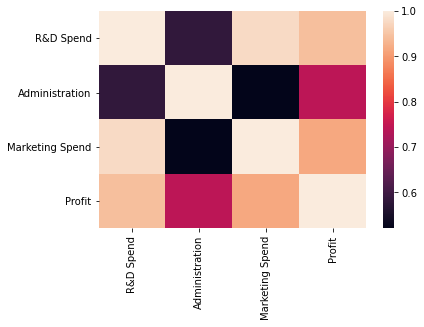

In [107]:
sns.heatmap(comp.corr())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


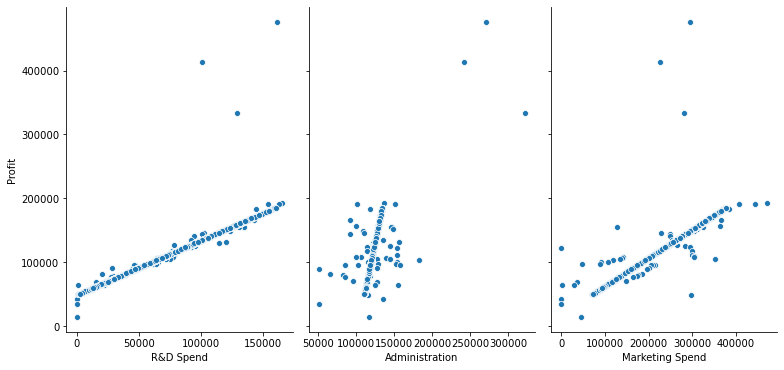

In [108]:
sns.pairplot(comp, x_vars=['R&D Spend','Administration','Marketing Spend'], y_vars='Profit', size=5, aspect=0.7)

#### i am using linear regeression because linear regression is commonly used in forecasting and financial analysis.

In [109]:
X=comp.drop(['Profit','City'],axis='columns')
X

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.800,471784.1000
1,162597.70,151377.590,443898.5300
2,153441.51,101145.550,407934.5400
3,144372.41,118671.850,383199.6200
4,142107.34,91391.770,366168.4200
...,...,...,...
995,54135.00,118451.999,173232.6695
996,134970.00,130390.080,329204.0228
997,100275.47,241926.310,227142.8200
998,128456.23,321652.140,281692.3200


In [110]:
y=comp.Profit
y

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [112]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [113]:
reg.fit(X_train,y_train)
accuracy = reg.score(X_test,y_test)
print(accuracy*100,'%')

92.11607689945409 %


In [114]:
print(reg.coef_)

[0.5264497  0.90468902 0.1022818 ]


In [115]:
print(reg.intercept_)

-57898.62572647951


In [116]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

NameError: name 'y_pred' is not defined

In [ ]:
prediction=reg.predict(X)

In [ ]:
prediction

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.mean_absolute_error(y,prediction))

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y,prediction)))

In [ ]:
print(metrics.mean_squared_error(y,prediction))

## Project 2:
### • Use wine dataset from sklearn
### • Load the dataset and split it into test and train.
### • Develop the model to Classify wines into different categories.
### • Train the model using Gaussian and Multinominal classifier, please mention which model is better and why.
### • Use the trained model to perform some predictions on test data

In [ ]:
from sklearn import datasets
from sklearn.datasets import load_wine

In [ ]:
rawdata = datasets.load_wine()
rawdata

In [ ]:
print(rawdata['DESCR'])

In [ ]:
for key,value in rawdata.items():
    print(key,'\n',value,'\n')

In [ ]:
print('data.shape\t',rawdata['data'].shape,
      '\ntarget.shape \t',rawdata['target'].shape)

In [ ]:
features = pd.DataFrame(data=rawdata['data'],columns=rawdata['feature_names'])
data = features
data['target']=rawdata['target']
data['class']=data['target'].map(lambda ind: rawdata['target_names'][ind])
data.head()


In [ ]:
data.describe()

In [ ]:
sns.distplot(data['alcohol'],kde=0)

In [ ]:
for i in data.target.unique():
    sns.distplot(data['alcohol'][data.target==i],
                 kde=1,label='{}'.format(i))

plt.legend()

In [ ]:
import matplotlib.gridspec as gridspec
for feature in rawdata['feature_names']:
    print(feature)
   
    gs1 = gridspec.GridSpec(3,1)
    ax1 = plt.subplot(gs1[:-1])
    ax2 = plt.subplot(gs1[-1])
    gs1.update(right=0.60)
    sns.boxplot(x=feature,y='class',data=data,ax=ax2)
    sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
    sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
    sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
    ax2.yaxis.label.set_visible(False)
    ax1.xaxis.set_visible(False)
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test, label_train, label_test = \
    train_test_split(rawdata['data'],rawdata['target'],
                     test_size=0.2)
print(len(data_train),' samples in training data\n',
      len(data_test),' samples in test data\n', )

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
dict_classifiers = {
    "Gaussian": 
            {'classifier': GaussianNB(),
                 'params': {}
            },
    "Multinominal": 
            {'classifier': MultinomialNB(),
                 'params': {}
            }
}

In [ ]:
from sklearn.model_selection import learning_curve 
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.6, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
import time
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score
num_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, X_test, Y_test, verbose = True):
    df_results = pd.DataFrame(
        data=np.zeros(shape=(num_classifiers,4)),
        columns = ['classifier',
                   'train_score', 
                   'test_score',
                   'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        grid = GridSearchCV(classifier['classifier'], 
                      classifier['params'],
                      refit=True,
                        cv = 10, # 9+1
                        scoring = 'accuracy', 
                        n_jobs = -1
                        )
        estimator = grid.fit(X_train,
                             Y_train)
        t_end = time.process_time()
        t_diff = t_end - t_start
        train_score = estimator.score(X_train,
                                      Y_train)
        test_score = estimator.score(X_test,
                                     Y_test)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'test_score'] = test_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key,
                                                    f=t_diff))
        count+=1
        plot_learning_curve(estimator, 
                              "{}".format(key),
                              X_train,
                              Y_train,
                              ylim=(0.75,1.0),
                              cv=10)
    return df_results

In [ ]:
df_results = batch_classify(data_train, label_train, data_test, label_test)
display(df_results.sort_values(by='test_score', ascending=False))

#### Gaussian better predict the training set, meaning they have low enough bias in order to capture all of the nuance of the data.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn import metrics

In [ ]:
X = rawdata['data']
X

In [ ]:
y = rawdata['target']
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=50)

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, y_train)

In [ ]:
prediction=gnb.predict(X)
prediction

In [ ]:
gnb.fit(X_train,y_train)
accuracy = gnb.score(X_test,y_test)
print(accuracy*100,'%')

In [ ]:
print(metrics.mean_absolute_error(y,prediction))

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y,prediction)))

In [ ]:
mun = MultinomialNB()

In [ ]:
mun.fit(X_train, y_train)

In [ ]:
prediction=mun.predict(X)
prediction

In [ ]:
mun.fit(X_train,y_train)
accuracy = mun.score(X_test,y_test)
print(accuracy*100,'%')

In [ ]:
print(metrics.mean_absolute_error(y,prediction))

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y,prediction)))

## Project 3:
## • Datasets for Disease operation is provided. Dataset filename: Disease.csv
### 1.Load the dataset and split it into test and train.
### 2.Analyse the Data Visually.
### 3.Find limitation with data if any indeveloping the model
### 4.Develop the model to identify whether operation success ful or not using Decision Tree algorithm
### 5.Measure the performance of the model
### 6.Try to improvise the model by suitable technique.
### 7.Measure the performance of the model

In [ ]:
df = pd.read_csv('Disease.csv')
df.head(10)

In [ ]:
df.info()

In [ ]:
sns.pairplot(df,hue='Kyphosis')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Kyphosis',axis=1)
X

In [ ]:
y = df['Kyphosis']
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

In [ ]:
print(classification_report(y_test,predictions))

## Project: 4
### •Use iris flower dataset from sklearn library and try to form clusters off lowers using petal width and length  features.
### •Analys the Data Visually before training
### •Drop other two features for simplicity.
### •Try to Use KMean Clustering
### •Analyse the Data Visually by comparing before and after the training

In [117]:
from sklearn.datasets import load_iris

In [118]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [119]:
df.shape

(150, 4)

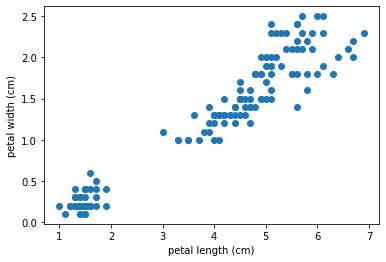

In [120]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df['petal length (cm)'],df['petal width (cm)'],cmap='rainbow')

In [121]:
from sklearn.cluster import KMeans

In [122]:
km=KMeans(n_clusters=3)

In [123]:
X=df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns')
X

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [124]:
km.fit(X);

In [125]:
y_predict=km.predict(X)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [126]:
df['cluster']=y_predict
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [127]:
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [128]:
df0=df[df.cluster==0]
df0

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
77,6.7,3.0,5.0,1.7,0
83,6.0,2.7,5.1,1.6,0
100,6.3,3.3,6.0,2.5,0
101,5.8,2.7,5.1,1.9,0
102,7.1,3.0,5.9,2.1,0
103,6.3,2.9,5.6,1.8,0
104,6.5,3.0,5.8,2.2,0
105,7.6,3.0,6.6,2.1,0
107,7.3,2.9,6.3,1.8,0
108,6.7,2.5,5.8,1.8,0


In [129]:
df1=df[df.cluster==1]
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [130]:
df2=df[df.cluster==2]
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
50,7.0,3.2,4.7,1.4,2
51,6.4,3.2,4.5,1.5,2
52,6.9,3.1,4.9,1.5,2
53,5.5,2.3,4.0,1.3,2
54,6.5,2.8,4.6,1.5,2
55,5.7,2.8,4.5,1.3,2
56,6.3,3.3,4.7,1.6,2
57,4.9,2.4,3.3,1.0,2
58,6.6,2.9,4.6,1.3,2
59,5.2,2.7,3.9,1.4,2


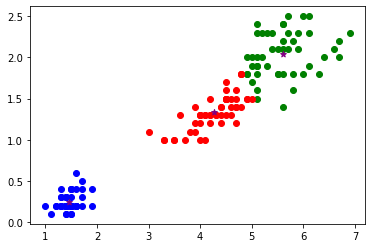

In [131]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*', label='centrod')

In [132]:
from sklearn.preprocessing import MinMaxScaler

In [133]:
scaler=MinMaxScaler()
df['petal length (cm']=scaler.fit_transform(df[['petal length (cm)']])
df['petal width (cm)']=scaler.fit_transform(df[['petal width (cm)']])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,petal length (cm
0,5.1,3.5,1.4,0.041667,1,0.067797
1,4.9,3.0,1.4,0.041667,1,0.067797
2,4.7,3.2,1.3,0.041667,1,0.050847
3,4.6,3.1,1.5,0.041667,1,0.084746
4,5.0,3.6,1.4,0.041667,1,0.067797
...,...,...,...,...,...,...
145,6.7,3.0,5.2,0.916667,0,0.711864
146,6.3,2.5,5.0,0.750000,0,0.677966
147,6.5,3.0,5.2,0.791667,0,0.711864
148,6.2,3.4,5.4,0.916667,0,0.745763


In [134]:
X=df.values[:,1:3]

In [135]:
km=KMeans(n_clusters=3)
km.fit(X);

In [136]:
y_predict=km.fit_predict(X)
y_predict


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0])

In [137]:
df['cluster']=y_predict
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,petal length (cm
0,5.1,3.5,1.4,0.041667,1,0.067797
1,4.9,3.0,1.4,0.041667,1,0.067797
2,4.7,3.2,1.3,0.041667,1,0.050847
3,4.6,3.1,1.5,0.041667,1,0.084746
4,5.0,3.6,1.4,0.041667,1,0.067797
...,...,...,...,...,...,...
145,6.7,3.0,5.2,0.916667,0,0.711864
146,6.3,2.5,5.0,0.750000,2,0.677966
147,6.5,3.0,5.2,0.791667,0,0.711864
148,6.2,3.4,5.4,0.916667,0,0.745763


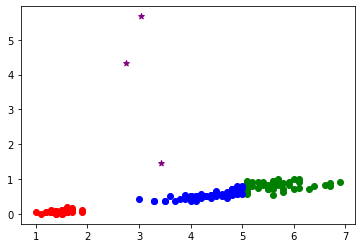

In [138]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*', label='centrod')


In [139]:
df.groupby('df').describe()



KeyError: 'df'